In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mh 

In [129]:
# it allows us to calculate root growth
def root_growth(R_max, k, t):
    return R_max/(1 + np.exp(-k*(t-t_half)))

In [139]:
R_max = 90 # I suppose that the maximum depth the root can reach is 90 cm
k = 0.1 # speed root growth coefficient
t_half = 50 # time at which the growth is at 50% of the maximum
t = np.linspace(1, 100, 50) # time interval

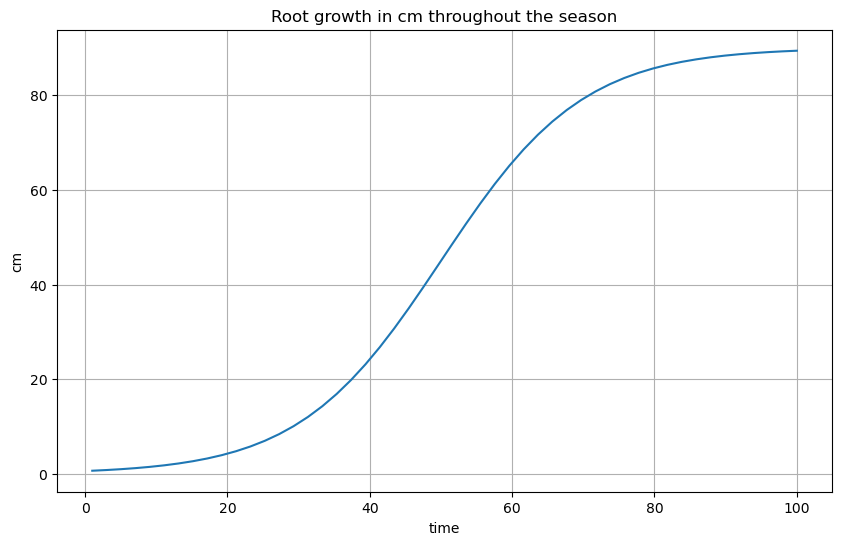

In [141]:
Root = pd.DataFrame()
Root['time'] = t
Root['root_growth'] = root_growth(R_max, k, t)

plt.figure(figsize= (10,6))
plt.plot(Root['time'], Root['root_growth'])
plt.title(f'Root growth in cm throughout the season')
plt.xlabel('time')
plt.ylabel('cm')
plt.grid(True)
plt.show()

In [143]:
def cumulative_distribution_root (R_max, z_values):
    return 1 - (0.01 ** (1/R_max)) ** z_values

The limiting depth value (z) for 90% cumulative distribution is: 45.61 cm


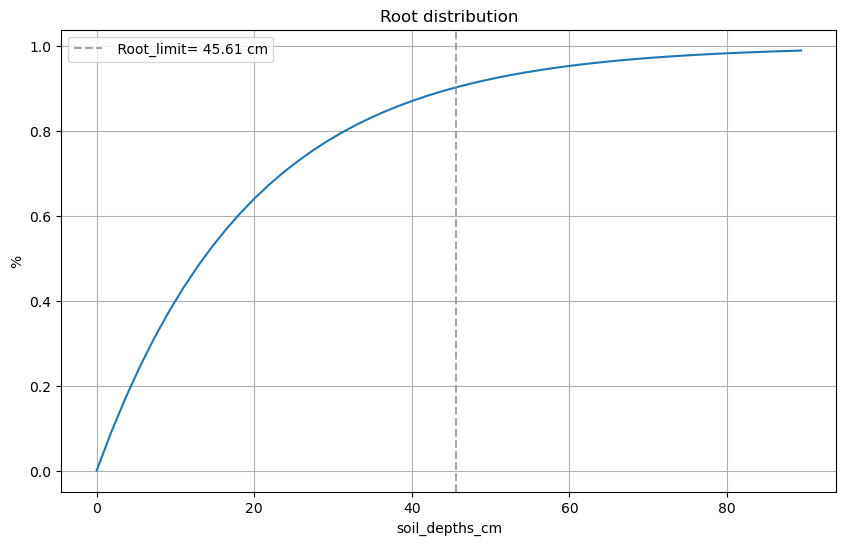

In [145]:
z_values= np.linspace (0, max(Root['root_growth']), 50) # creating different soil depths, considering that r-max is the maximum possible value

Root_distribution = pd.DataFrame()
Root_distribution['soil_layers']= z_values
Root_distribution['cumulative_distribution_root']= cumulative_distribution_root(R_max, z_values)

idx_90 = np.abs(Root_distribution['cumulative_distribution_root'] - 0.9).argmin() # find the index closest to 0.9.
Root_90 = z_values[idx_90]
print(f"The limiting depth value (z) for 90% cumulative distribution is: {Root_90:.2f} cm")


plt.figure(figsize= (10,6))
plt.plot(Root_distribution['soil_layers'], Root_distribution['cumulative_distribution_root'])
plt.axvline(Root_90, linestyle= '--', color='gray', alpha= 0.7, label=f' Root_limit= {Root_90:.2f} cm')

plt.title(f'Root distribution')
plt.xlabel('soil_depths_cm')
plt.ylabel('%')
plt.legend()
plt.grid(True)
plt.show()